In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import datasets
import seaborn as sns
import math
from datasets import load_dataset
from scipy import stats

from pandas.api.types import is_categorical_dtype 
from pandas.api.types import is_numeric_dtype

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import Normalizer

from sklearn.model_selection import train_test_split

C:\Users\wesse\AppData\Roaming\Python\Python313\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Loading data and preprocessing

In [5]:
dataset = load_dataset("csv", data_files="dataset-iml-task.csv")
df = dataset["train"].to_pandas() 

In [6]:
print(df.shape)
print('-'*30)
df.info() 
print('-'*30)
df.columns 

(100000, 23)
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 23 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   radius_1          100000 non-null  float64
 1   radius_2          100000 non-null  float64
 2   radius_3          100000 non-null  float64
 3   radius_4          100000 non-null  float64
 4   radius_5          100000 non-null  float64
 5   radius_6          100000 non-null  float64
 6   radius_7          100000 non-null  float64
 7   radius_8          100000 non-null  float64
 8   radius_9          100000 non-null  float64
 9   radius_10         100000 non-null  float64
 10  radius_11         100000 non-null  float64
 11  distance_1        100000 non-null  float64
 12  distance_2        100000 non-null  float64
 13  distance_3        100000 non-null  float64
 14  distance_4        100000 non-null  float64
 15  distance_5        100000 

Index(['radius_1', 'radius_2', 'radius_3', 'radius_4', 'radius_5', 'radius_6',
       'radius_7', 'radius_8', 'radius_9', 'radius_10', 'radius_11',
       'distance_1', 'distance_2', 'distance_3', 'distance_4', 'distance_5',
       'distance_6', 'distance_7', 'distance_8', 'distance_9', 'distance_10',
       'is_path_breaking', 'val'],
      dtype='object')

In [7]:
pd.set_option('display.max_columns', None)
df.describe()

C:\Users\wesse\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)
C:\Users\wesse\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:4671: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


,radius_1,radius_2,radius_3,radius_4,radius_5,radius_6,radius_7,radius_8,radius_9,radius_10,radius_11,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10,is_path_breaking,val
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,65.044330,229.665952,36.329690,219.388561,43.034302,inf,-53.597014,-2.100581,8.876903,25.389511,-147.777615,8.828356,3.664074,7.598081,2.968144,1.425306e+01,1.242813e+01,3.118917,16.091768,7.799964,10.209958,0.493850,8674.364058
std,19.942685,13327.642206,5.297852,16348.463693,33.476118,NaN,9322.128189,3565.672153,8400.481325,5830.133854,9939.394856,3.562024,3.746841,1.394150,1.797526,3.552731e-15,3.552731e-15,2.760582,10.023519,2.474447,6.789740,0.499965,13480.659431
min,34.271620,-1000000.000000,25.740212,-1000000.000000,15.655525,inf,-1000000.000000,-451334.018787,-1000000.000000,-680053.549825,-1000000.000000,1.451102,-3.767297,4.380450,-1.369706,1.425306e+01,1.242813e+01,-2.846171,-2.959530,2.452672,-2.891098,0.000000,0.000095
25%,49.484264,160.606403,31.794636,-196.126042,22.203383,NaN,-95.458935,-21.293917,-52.041403,-32.010608,-173.359585,5.842924,0.162099,6.501052,1.658741,1.425306e+01,1.242813e+01,0.822416,7.174029,5.735453,4.428347,0.000000,101.145005
50%,60.266032,230.593591,35.650051,105.842519,31.360491,NaN,-46.790790,-10.979083,22.809537,19.374305,-101.066464,8.756282,3.560396,7.621792,2.929907,1.425306e+01,1.242813e+01,3.040759,16.357401,7.751868,10.064013,0.000000,859.843437
75%,75.501056,374.648645,40.167556,257.308972,52.054941,NaN,-30.712435,23.526112,47.804179,47.705298,-63.906138,11.982353,6.960958,8.728655,4.319666,1.425306e+01,1.242813e+01,5.448098,24.940567,9.973858,16.281295,1.000000,13391.989968
max,222.908088,1000000.000000,57.286703,1000000.000000,961.049318,inf,1000000.000000,642092.894059,1000000.000000,1000000.000000,1000000.000000,16.305912,11.270353,10.740450,7.291342,1.425306e+01,1.242813e+01,9.192255,34.739513,13.136857,23.635883,1.000000,116810.921524


In [8]:
print(df['distance_5'])
print(df['distance_6'])

0        14.253059
1        14.253059
2        14.253059
3        14.253059
4        14.253059
           ...    
99995    14.253059
99996    14.253059
99997    14.253059
99998    14.253059
99999    14.253059
Name: distance_5, Length: 100000, dtype: float64
0        12.428129
1        12.428129
2        12.428129
3        12.428129
4        12.428129
           ...    
99995    12.428129
99996    12.428129
99997    12.428129
99998    12.428129
99999    12.428129
Name: distance_6, Length: 100000, dtype: float64


In [9]:
df = df.drop(columns=["radius_6"])

In [10]:
categorical_cols = [col for col in df.columns if isinstance(df[col].dtype, pd.CategoricalDtype)]  #isinstance(obj, cls) checks whether obj is an instance of class cls
Numerical_cols = [col for col in df.columns if is_numeric_dtype(df[col])]

In [11]:
# labelling different columns
target_cols = ['is_path_breaking','val']
data_cols = ['radius_1','radius_2','radius_3','radius_4','radius_5','radius_7','radius_8','radius_9','radius_10','radius_11','distance_1','distance_2','distance_3','distance_4','distance_5','distance_6','distance_7','distance_8','distance_9','distance_10']
radius_cols = ['radius_1','radius_2','radius_3','radius_4','radius_5','radius_7','radius_8','radius_9','radius_10','radius_11']
distance_cols = ['distance_1','distance_2','distance_3','distance_4','distance_5','distance_6','distance_7','distance_8','distance_9','distance_10']
radius_cols = ['radius_1','radius_2','radius_3','radius_4','radius_5','radius_7','radius_8','radius_9','radius_10','radius_11']

In [12]:
# Check for missing values
for cols in df.columns:
    if int(df[cols].isnull().sum()) == 0:  # is null tells you if each entry in that column is nan or not
        print(cols,": has no missing values")                                 # .sum() sums up all of the values
        continue                           # if condition true: then we break here and go to next element
    datatype = df[cols].dtype
    print(cols,":", datatype, "has", int(df[cols].isnull().sum()), "missing values")
    print("-"*30)


radius_1 : has no missing values
radius_2 : has no missing values
radius_3 : has no missing values
radius_4 : has no missing values
radius_5 : has no missing values
radius_7 : has no missing values
radius_8 : has no missing values
radius_9 : has no missing values
radius_10 : has no missing values
radius_11 : has no missing values
distance_1 : has no missing values
distance_2 : has no missing values
distance_3 : has no missing values
distance_4 : has no missing values
distance_5 : has no missing values
distance_6 : has no missing values
distance_7 : has no missing values
distance_8 : has no missing values
distance_9 : has no missing values
distance_10 : has no missing values
is_path_breaking : has no missing values
val : has no missing values


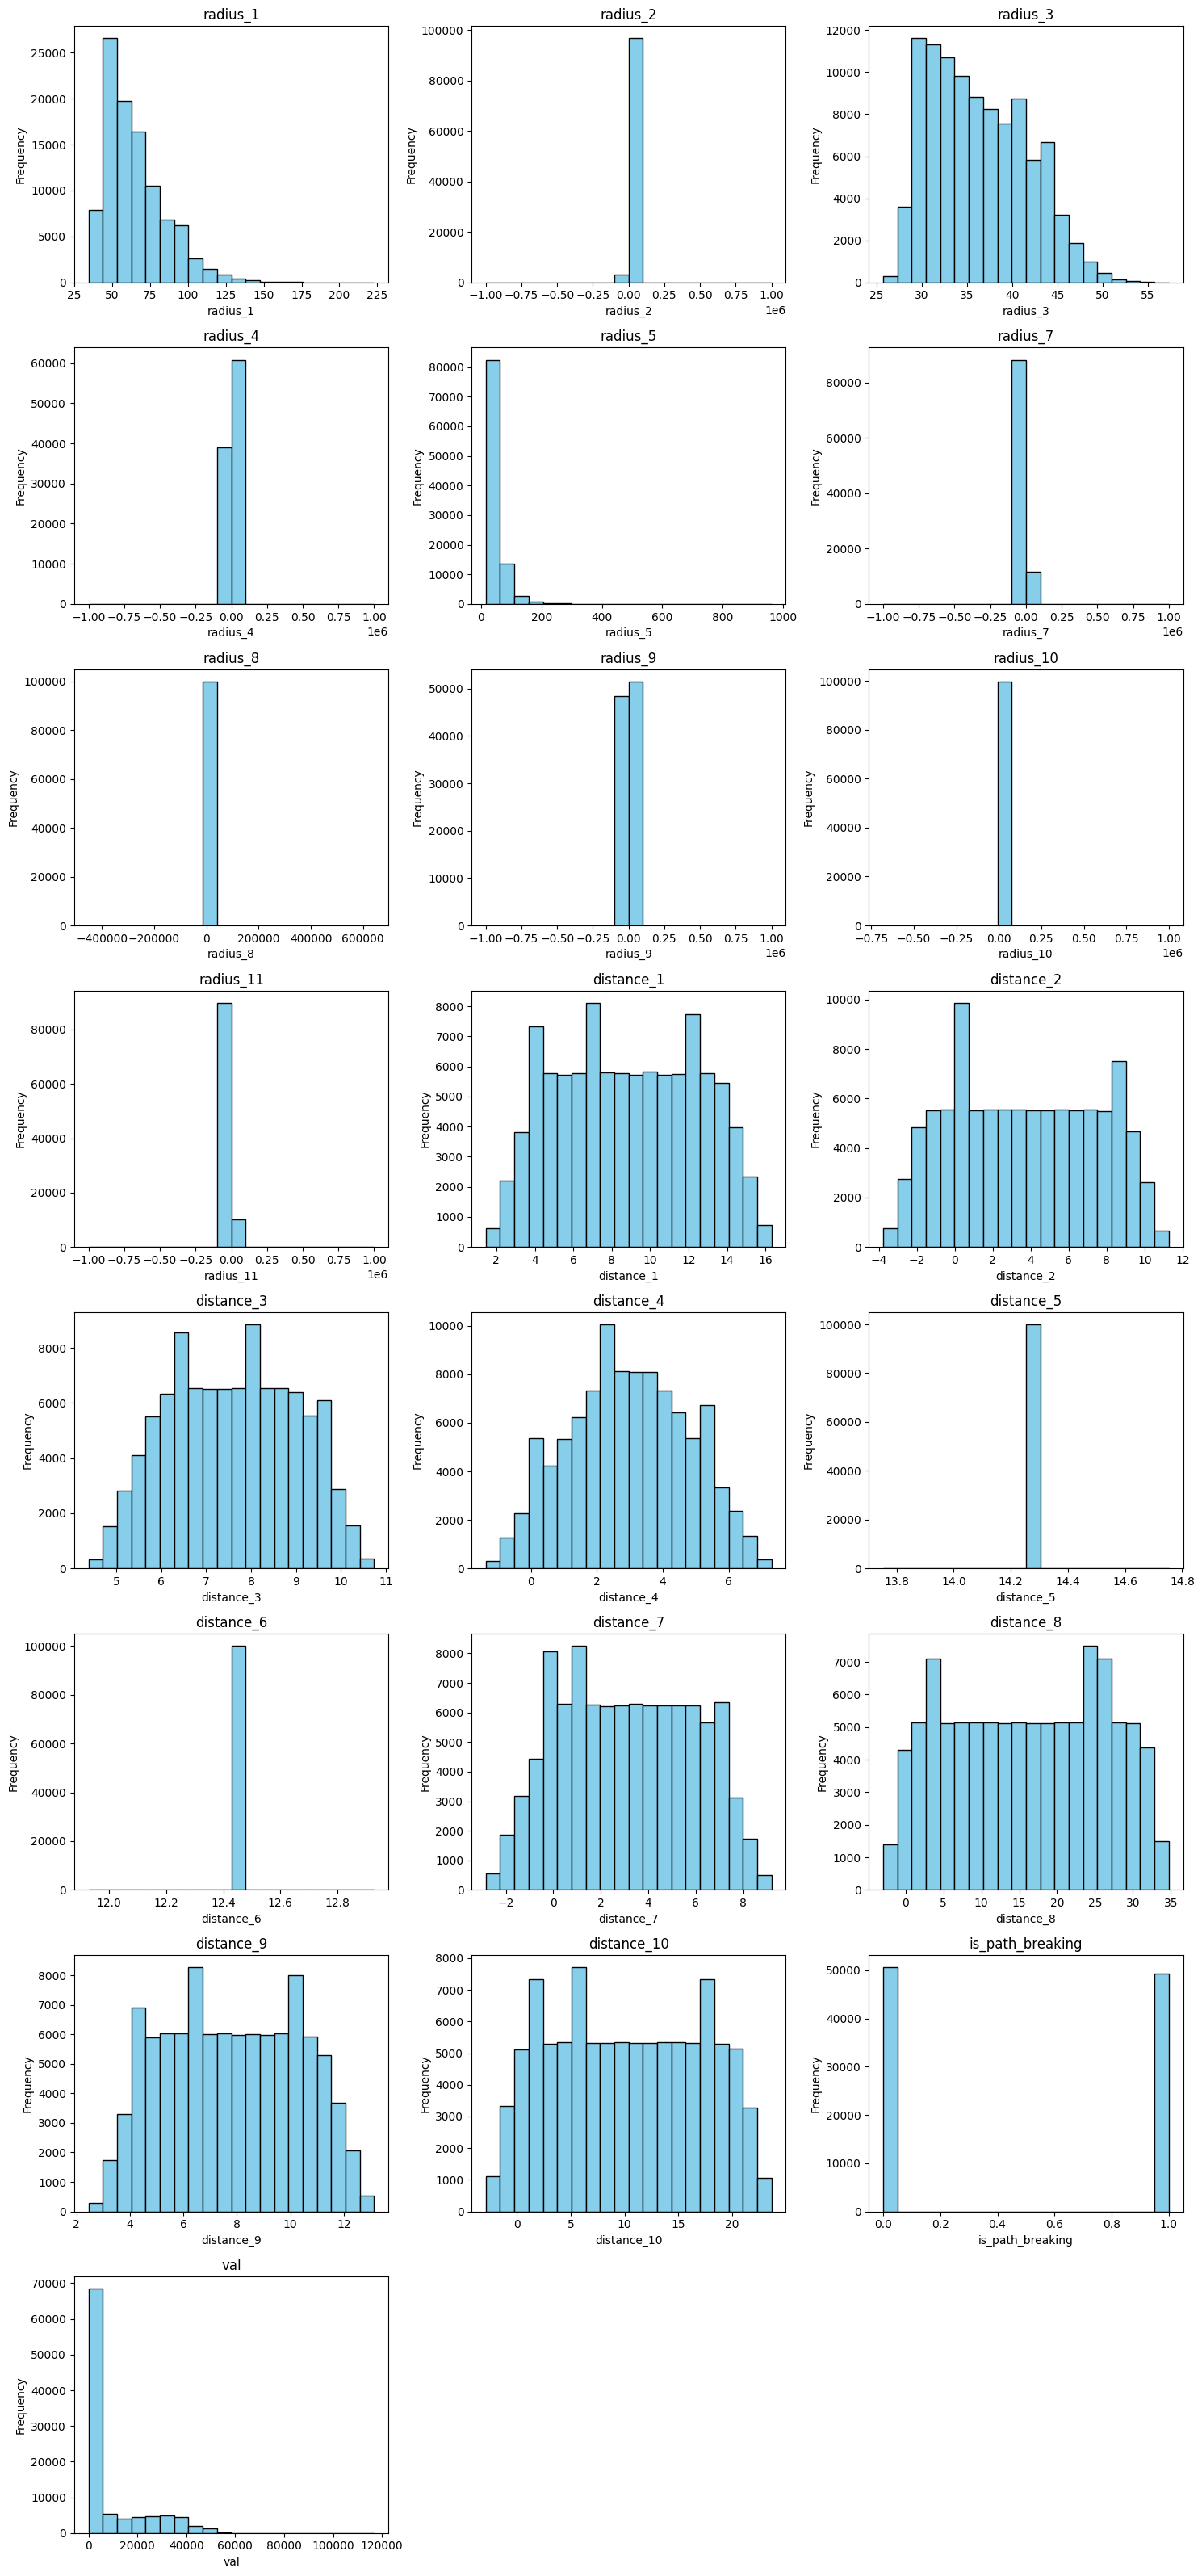

ValueError: Number of rows must be a positive integer, not 0

<Figure size 1500x0 with 0 Axes>

In [13]:
n_cols = len(Numerical_cols)

# Define number of columns in the grid
n_grid_cols = 3  
n_grid_rows = math.ceil(n_cols / n_grid_cols)

# Create subplots
fig, axes = plt.subplots(n_grid_rows, n_grid_cols, figsize=(5 * n_grid_cols, 4 * n_grid_rows))
axes = axes.flatten()  # flatten in case of multiple rows

# Plot histograms
for i, col in enumerate(Numerical_cols):
    axes[i].hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[i].set_title(col)
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


#Box plots plot for all catagorical freatures
n_cols = 3 
n_rows = math.ceil(len(categorical_cols) / n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 5*n_rows))
axes = axes.flatten()  

for i, col in enumerate(categorical_cols):
    sns.boxplot(x=col, y='SalePrice', data=df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=45)

for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

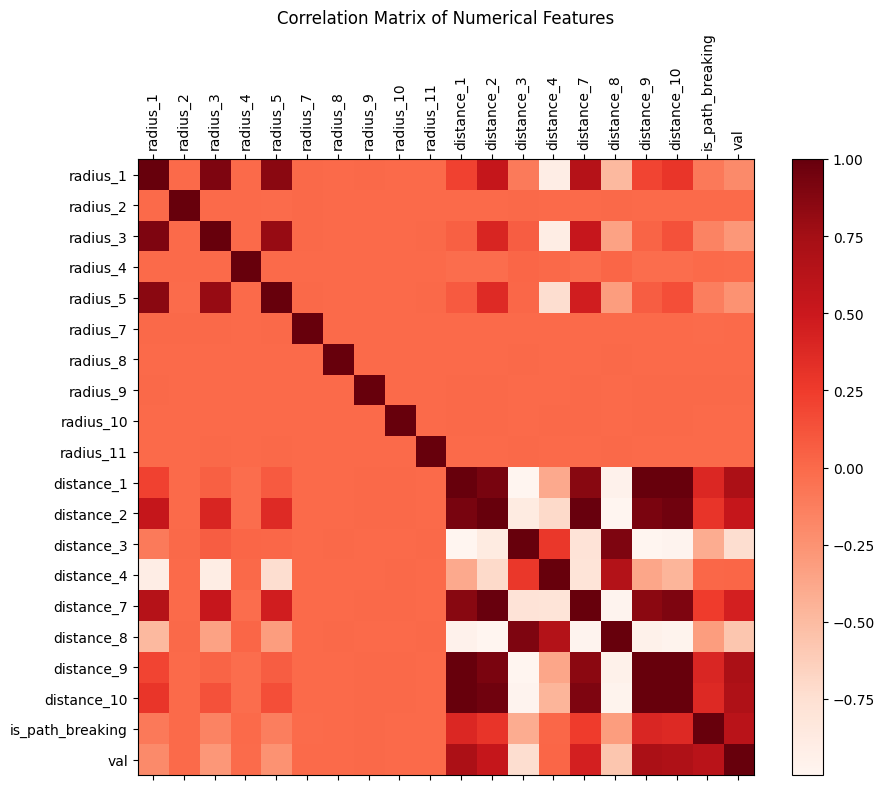

In [14]:
df_corr_mat = df.drop(columns=["distance_5", "distance_6"])
Numerical_cols_corr_mat = [col for col in df_corr_mat.columns if is_numeric_dtype(df_corr_mat[col])]

corr_matrix = df_corr_mat[Numerical_cols_corr_mat].corr() # does all of the correlation calculations for you .iloc for rows

fig, ax = plt.subplots(figsize=(10, 8))
cax = ax.matshow(corr_matrix, cmap='Reds')  # matplot lib function red = higher correlation
fig.colorbar(cax) 

ax.set_xticks(range(len(corr_matrix.columns)))
ax.set_yticks(range(len(corr_matrix.columns)))
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

plt.title('Correlation Matrix of Numerical Features')
plt.show()


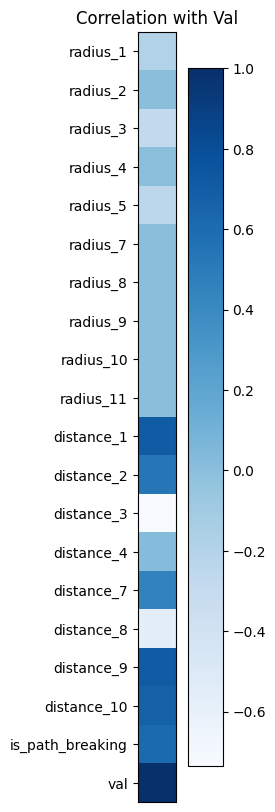

In [15]:
val_corr = corr_matrix['val'].values.reshape(-1, 1)  # reshape to 2D for matshow

# Plot
fig, ax = plt.subplots(figsize=(3, len(Numerical_cols_corr_mat) * 0.5))

cax = ax.matshow(val_corr, cmap='Blues')

# Color bar
fig.colorbar(cax)

# Set y-ticks to column names
ax.set_yticks(range(len(Numerical_cols_corr_mat)))
ax.set_yticklabels(Numerical_cols_corr_mat)

# Remove x-axis labels since it's just one column
ax.set_xticks([])

plt.title('Correlation with Val')
plt.show()

<Axes: xlabel='distance_1', ylabel='distance_10'>

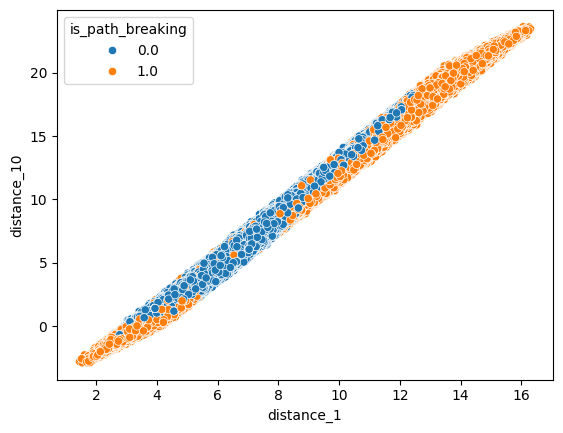

In [16]:
sns.scatterplot(df, x ='distance_1',y ='distance_10', hue = 'is_path_breaking')

## Scaling Values

In [17]:
# Different scalers 
scaler = StandardScaler() # Returns a scaled column with mean 0 and standard deviation 1. New values are essentiall Z-scores
minmax_scaler = MinMaxScaler() # Scales x-x_min / x_max - x_min , range [0,1]
robust_scaler = RobustScaler() # scales as x-median / IQR
scaler = MaxAbsScaler() # x / max(|x|)

In [18]:
df_s = scaler.fit_transform(df)
df_s.shape
df_s = pd.DataFrame(data=df_s, columns=df.columns)
df_s.describe()
# not all mean zero due to the presence of outliers

,radius_1,radius_2,radius_3,radius_4,radius_5,radius_7,radius_8,radius_9,radius_10,radius_11,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10,is_path_breaking,val
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.0,100000.0,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,1.000000e+05
mean,0.291799,0.000230,0.634173,0.000219,0.044778,-0.000054,-0.000003,0.000009,0.000025,-0.000148,0.541421,0.325107,0.707427,0.407078,1.0,1.0,0.339298,0.463212,0.593747,0.431969,0.493850,7.425987e-02
std,0.089466,0.013328,0.092480,0.016348,0.034833,0.009322,0.005553,0.008400,0.005830,0.009939,0.218450,0.332451,0.129804,0.246529,0.0,0.0,0.300316,0.288534,0.188359,0.287264,0.499965,1.154058e-01
min,0.153748,-1.000000,0.449323,-1.000000,0.016290,-1.000000,-0.702911,-1.000000,-0.680054,-1.000000,0.088992,-0.334266,0.407846,-0.187854,1.0,1.0,-0.309627,-0.085192,0.186702,-0.122318,0.000000,8.165843e-10
25%,0.221994,0.000161,0.555009,-0.000196,0.023103,-0.000095,-0.000033,-0.000052,-0.000032,-0.000173,0.358332,0.014383,0.605287,0.227495,1.0,1.0,0.089468,0.206509,0.436592,0.187357,0.000000,8.658865e-04
50%,0.270363,0.000231,0.622309,0.000106,0.032632,-0.000047,-0.000017,0.000023,0.000019,-0.000101,0.537000,0.315908,0.709634,0.401834,1.0,1.0,0.330796,0.470859,0.590085,0.425794,0.000000,7.360985e-03
75%,0.338709,0.000375,0.701167,0.000257,0.054165,-0.000031,0.000037,0.000048,0.000048,-0.000064,0.734847,0.617634,0.812690,0.592438,1.0,1.0,0.592684,0.717931,0.759227,0.688838,1.000000,1.146467e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


Number of outliers with z_thresh=3: 871
Z-score threshold: ±3
Corresponding data bounds: lower = -31767.61, upper = 49116.34


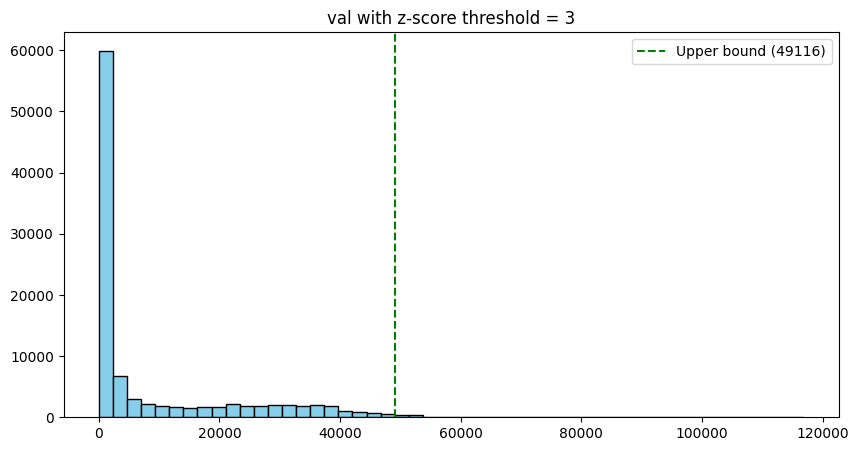

Data size before removing outliers: 100000
Data size after removing outliers: 99129


In [19]:
# Outlier finding and removal
z_thresh = 3 
col = 'val'
data = df[col]

z_scores = stats.zscore(data, nan_policy='omit') # Computes the z scores of the data using the mean and standed deviation, omits the unknown values


outliers = np.abs(z_scores) > z_thresh # boolean array for all the rows saying whether or not they are an outlier
n_outliers = outliers.sum()
print(f"Number of outliers with z_thresh={z_thresh}: {n_outliers}")

mean_val = data.mean()
std_val = data.std()

lower_bound = mean_val - z_thresh * std_val
upper_bound = mean_val + z_thresh * std_val

print(f"Z-score threshold: ±{z_thresh}")
print(f"Corresponding data bounds: lower = {lower_bound:.2f}, upper = {upper_bound:.2f}")
#lowerbound in this case is negative which makes no sense

plt.figure(figsize=(10,5))
plt.hist(data, bins=50, color='skyblue', edgecolor='black')
plt.title(f'{col} with z-score threshold = {z_thresh}')

#plotting vertical lines for lower and upper, dont need lower in this case
#plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound ({lower_bound:.0f})')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper bound ({upper_bound:.0f})')
plt.legend()
plt.show()

# Remove outliers from dataframe
df_clean = df[~outliers].copy() # ~ is the not operation, flips the boolean array
print(f"Data size before removing outliers: {df.shape[0]}")
print(f"Data size after removing outliers: {df_clean.shape[0]}")



radius_1: Number of outliers with z_thresh=3 = 1085
Z-score threshold: ±3
Data bounds for 'radius_1': lower = 5.22, upper = 124.87


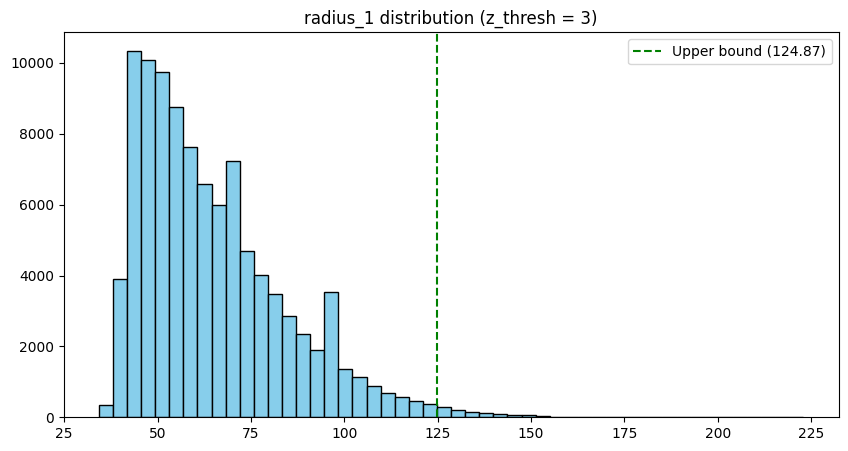

radius_2: Number of outliers with z_thresh=3 = 196
Z-score threshold: ±3
Data bounds for 'radius_2': lower = -39753.26, upper = 40212.59


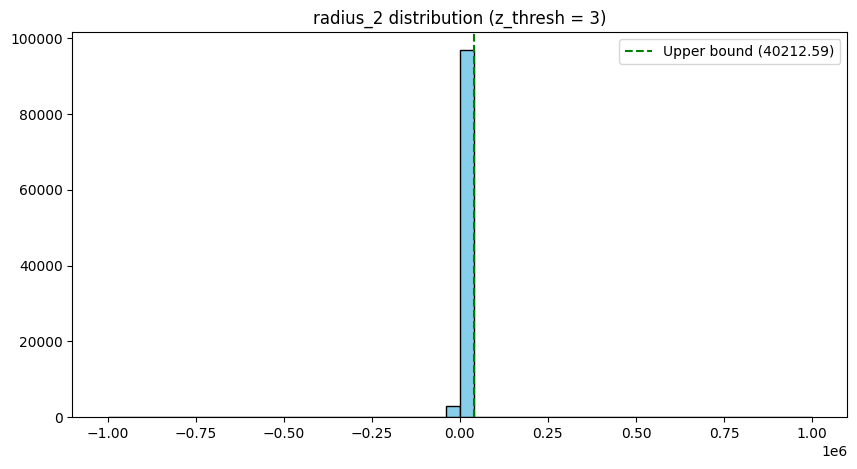

radius_3: Number of outliers with z_thresh=3 = 102
Z-score threshold: ±3
Data bounds for 'radius_3': lower = 20.44, upper = 52.22


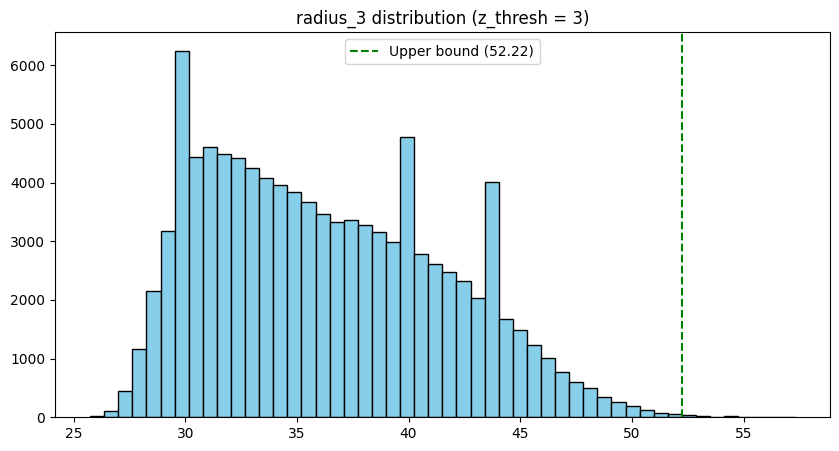

radius_4: Number of outliers with z_thresh=3 = 246
Z-score threshold: ±3
Data bounds for 'radius_4': lower = -48826.00, upper = 49264.78


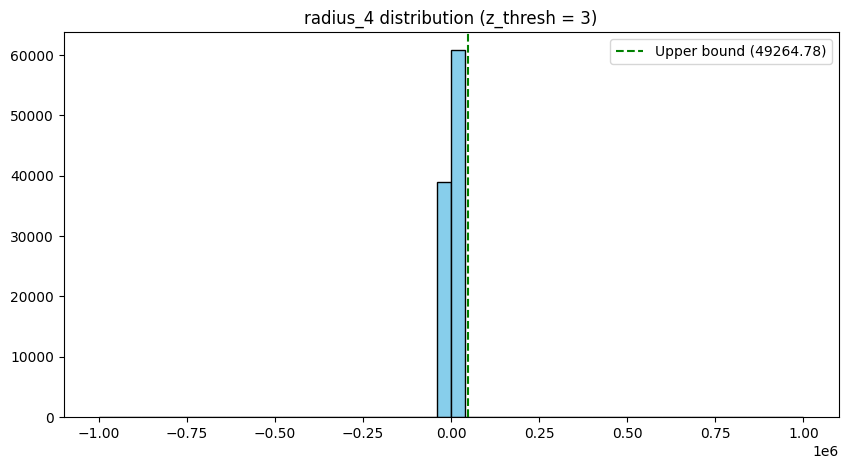

radius_5: Number of outliers with z_thresh=3 = 1887
Z-score threshold: ±3
Data bounds for 'radius_5': lower = -57.39, upper = 143.46


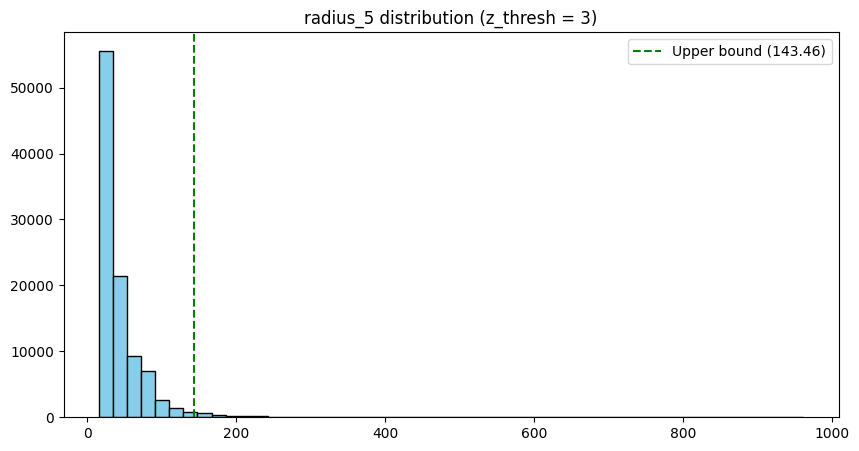

radius_7: Number of outliers with z_thresh=3 = 121
Z-score threshold: ±3
Data bounds for 'radius_7': lower = -28019.98, upper = 27912.79


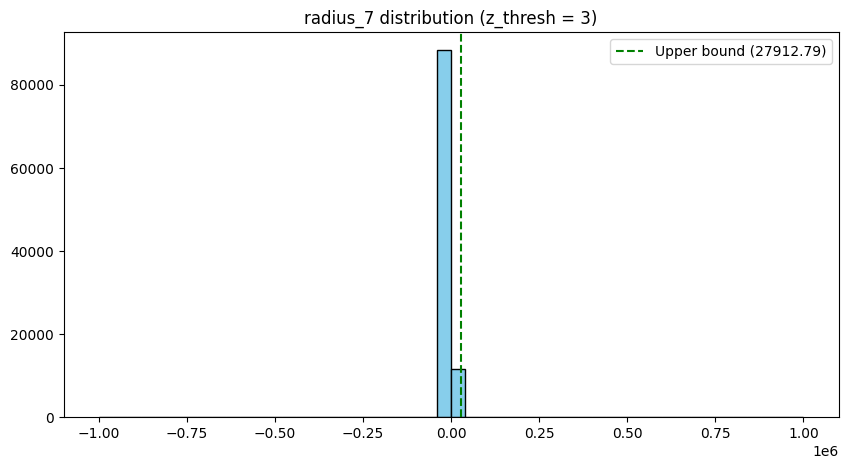

radius_8: Number of outliers with z_thresh=3 = 90
Z-score threshold: ±3
Data bounds for 'radius_8': lower = -10699.12, upper = 10694.92


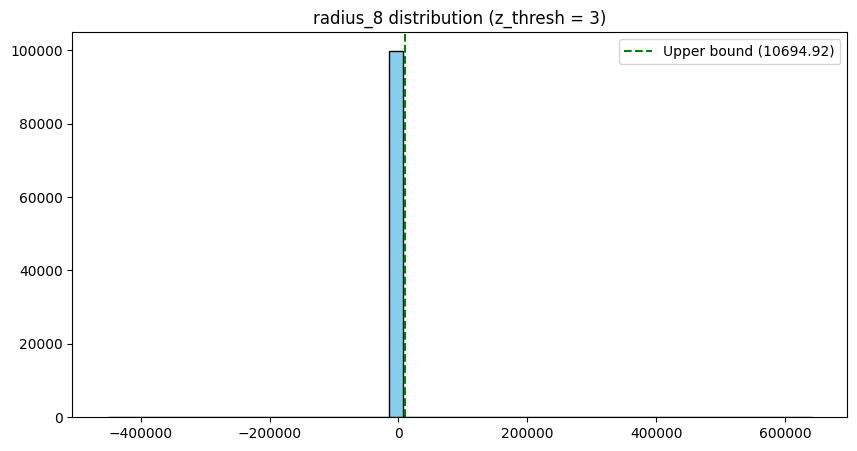

radius_9: Number of outliers with z_thresh=3 = 113
Z-score threshold: ±3
Data bounds for 'radius_9': lower = -25192.57, upper = 25210.32


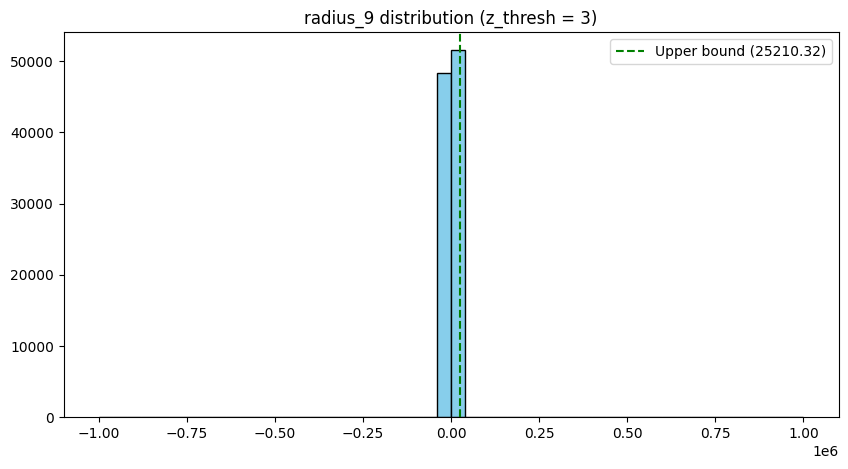

radius_10: Number of outliers with z_thresh=3 = 111
Z-score threshold: ±3
Data bounds for 'radius_10': lower = -17465.01, upper = 17515.79


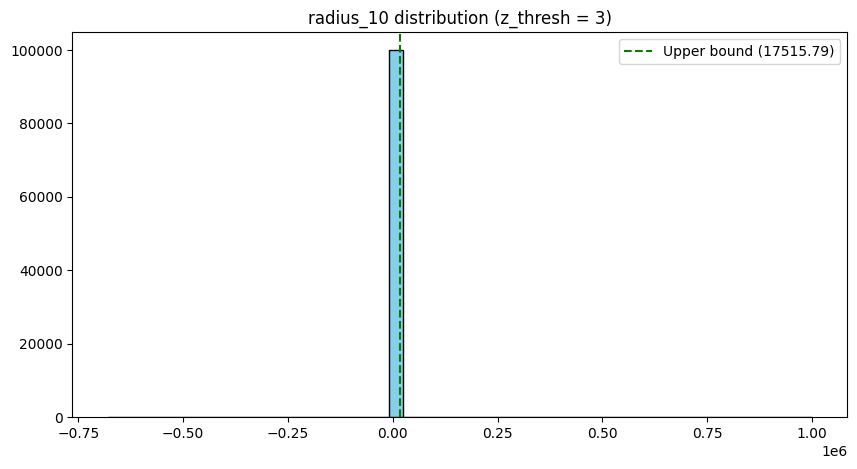

radius_11: Number of outliers with z_thresh=3 = 185
Z-score threshold: ±3
Data bounds for 'radius_11': lower = -29965.96, upper = 29670.41


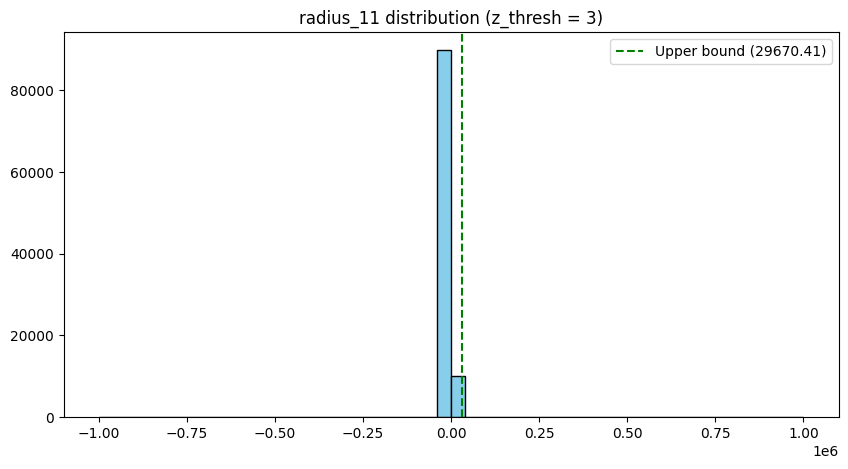

distance_1: Number of outliers with z_thresh=3 = 0
Z-score threshold: ±3
Data bounds for 'distance_1': lower = -1.86, upper = 19.51


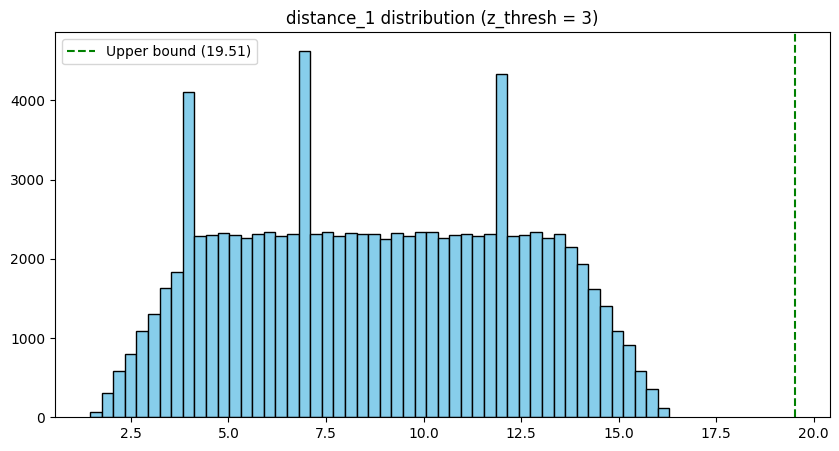

distance_2: Number of outliers with z_thresh=3 = 0
Z-score threshold: ±3
Data bounds for 'distance_2': lower = -7.58, upper = 14.90


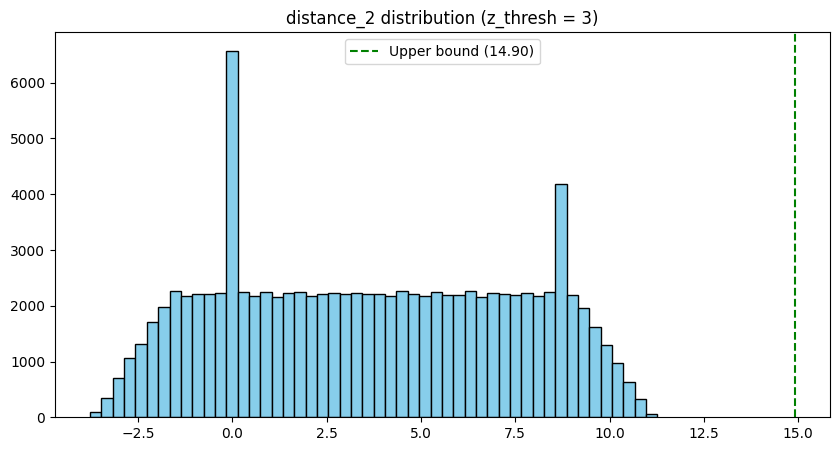

distance_3: Number of outliers with z_thresh=3 = 0
Z-score threshold: ±3
Data bounds for 'distance_3': lower = 3.42, upper = 11.78


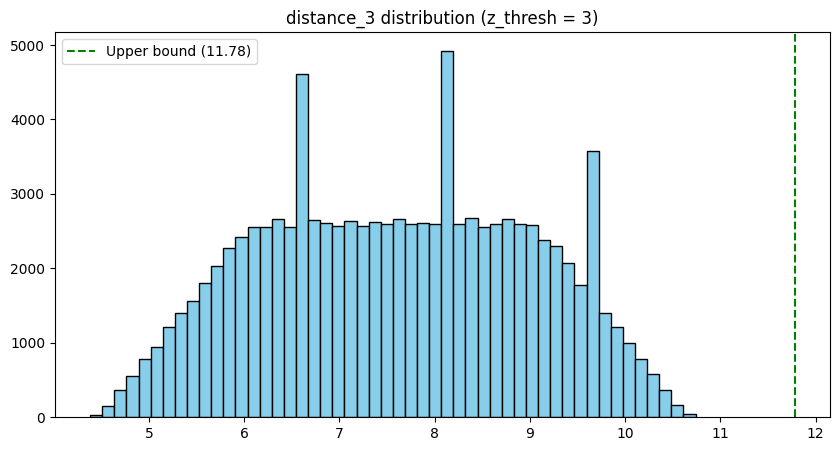

distance_4: Number of outliers with z_thresh=3 = 0
Z-score threshold: ±3
Data bounds for 'distance_4': lower = -2.42, upper = 8.36


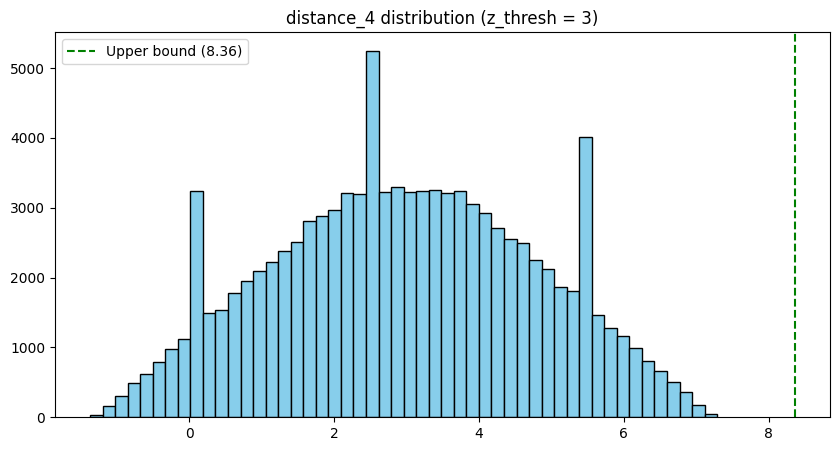

distance_5: Number of outliers with z_thresh=3 = 0
Z-score threshold: ±3
Data bounds for 'distance_5': lower = 14.25, upper = 14.25


C:\Users\wesse\AppData\Local\Temp\ipykernel_25308\1833975983.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = stats.zscore(data, nan_policy='omit')


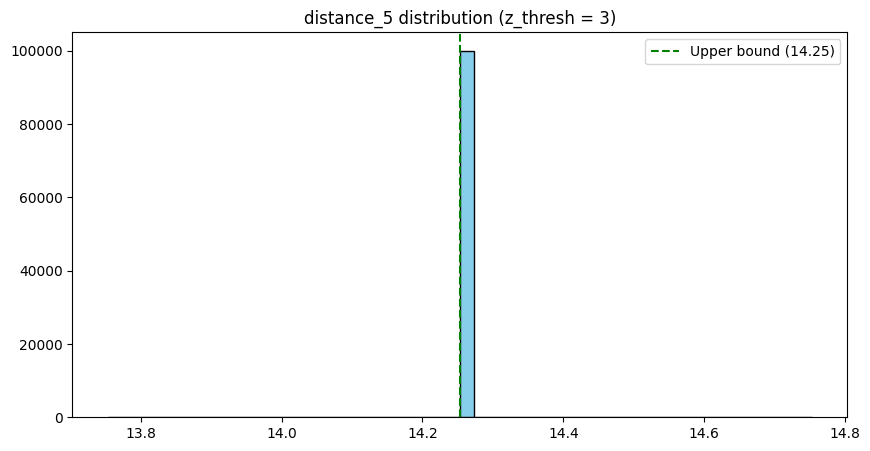

C:\Users\wesse\AppData\Local\Temp\ipykernel_25308\1833975983.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  z_scores = stats.zscore(data, nan_policy='omit')


distance_6: Number of outliers with z_thresh=3 = 0
Z-score threshold: ±3
Data bounds for 'distance_6': lower = 12.43, upper = 12.43


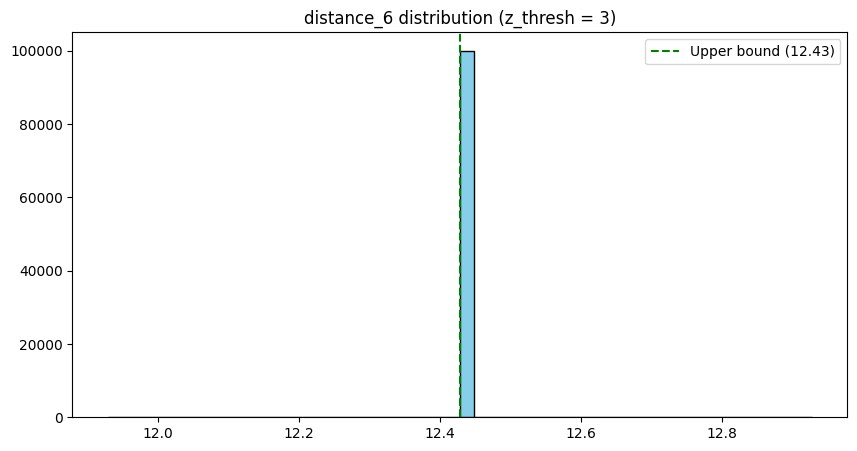

distance_7: Number of outliers with z_thresh=3 = 0
Z-score threshold: ±3
Data bounds for 'distance_7': lower = -5.16, upper = 11.40


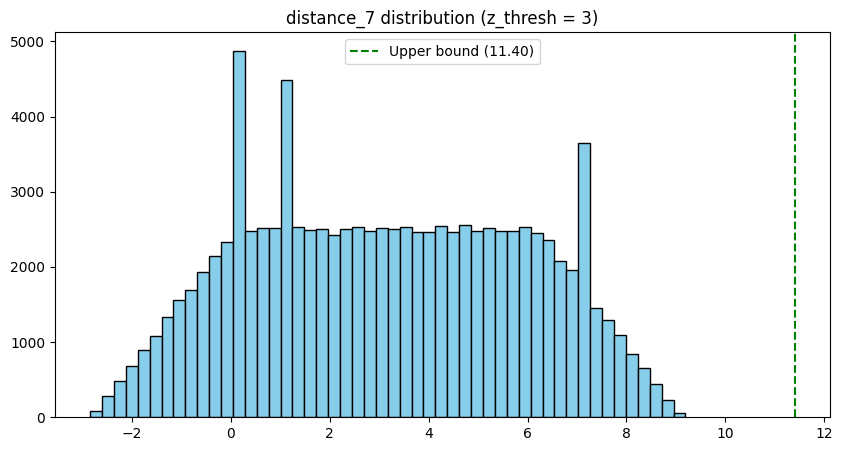

distance_8: Number of outliers with z_thresh=3 = 0
Z-score threshold: ±3
Data bounds for 'distance_8': lower = -13.98, upper = 46.16


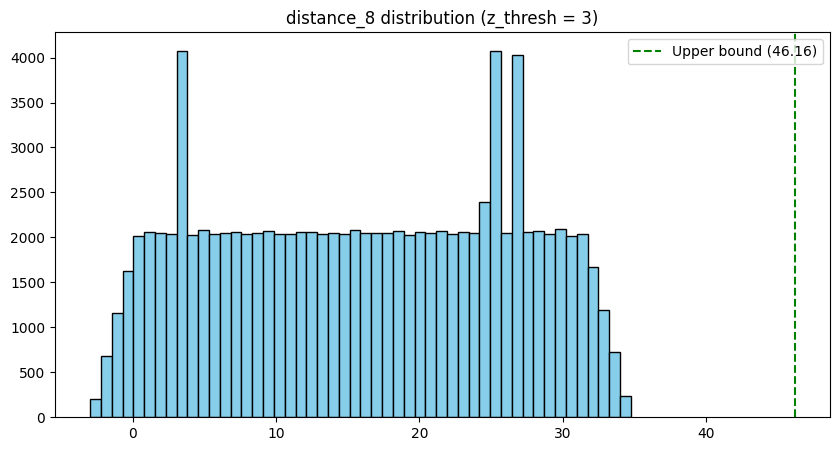

distance_9: Number of outliers with z_thresh=3 = 0
Z-score threshold: ±3
Data bounds for 'distance_9': lower = 0.38, upper = 15.22


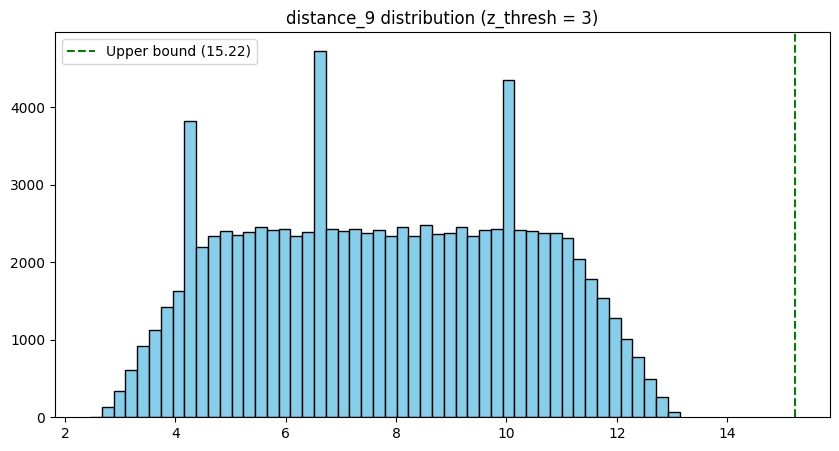

distance_10: Number of outliers with z_thresh=3 = 0
Z-score threshold: ±3
Data bounds for 'distance_10': lower = -10.16, upper = 30.58


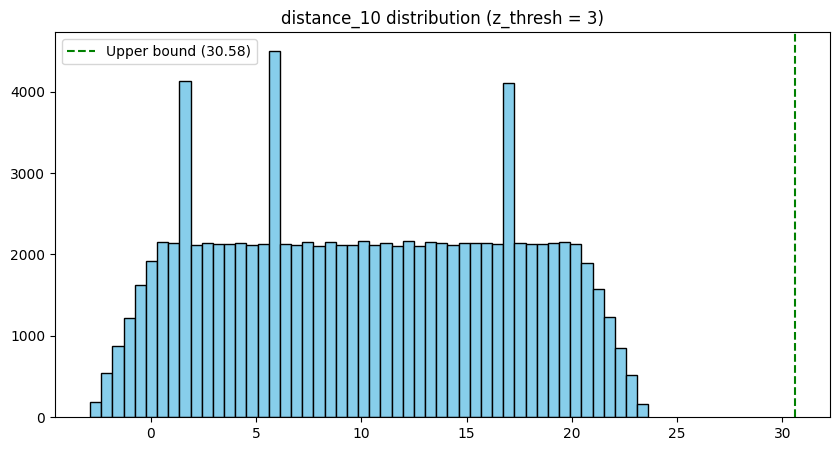

is_path_breaking: Number of outliers with z_thresh=3 = 0
Z-score threshold: ±3
Data bounds for 'is_path_breaking': lower = -1.01, upper = 1.99


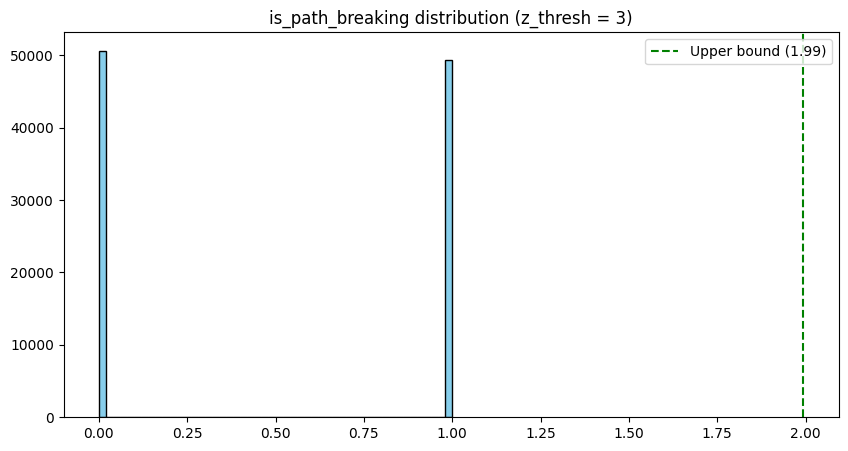

val: Number of outliers with z_thresh=3 = 871
Z-score threshold: ±3
Data bounds for 'val': lower = -31767.61, upper = 49116.34


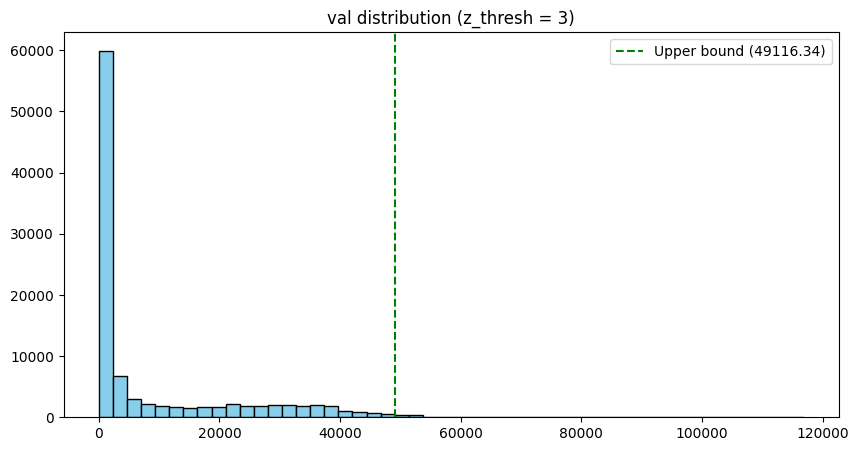

Total rows identified as outliers (any feature): 4208
Data size before removing outliers: 100000
Data size after removing outliers: 95792


In [20]:
z_thresh = 3
all_outliers_mask = np.zeros(len(df), dtype=bool)  # boolean mask for any outlier per row

for col in df.columns:
    data = df[col]
    # Compute z-scores for this feature (ignore NaNs in calculation)
    z_scores = stats.zscore(data, nan_policy='omit')
    outliers = np.abs(z_scores) > z_thresh         # boolean mask of outliers for this feature
    n_outliers = outliers.sum()                    # number of outlier points in this feature
    
    # Print outlier info for this feature
    print(f"{col}: Number of outliers with z_thresh={z_thresh} = {n_outliers}")
    mean_val = data.mean()
    std_val = data.std()
    lower_bound = mean_val - z_thresh * std_val
    upper_bound = mean_val + z_thresh * std_val
    print(f"Z-score threshold: ±{z_thresh}")
    print(f"Data bounds for '{col}': lower = {lower_bound:.2f}, upper = {upper_bound:.2f}")
    
    # Plot the distribution with the upper bound (threshold) marked
    plt.figure(figsize=(10,5))
    plt.hist(data, bins=50, color='skyblue', edgecolor='black')
    plt.title(f"{col} distribution (z_thresh = {z_thresh})")
    # Mark the threshold line (upper bound; lower bound can be shown if relevant and positive)
    plt.axvline(upper_bound, color='green', linestyle='--', label=f'Upper bound ({upper_bound:.2f})')
    # If lower bound is meaningful (e.g., for symmetric distribution), you could plot it:
    # plt.axvline(lower_bound, color='red', linestyle='--', label=f'Lower bound ({lower_bound:.2f})')
    plt.legend()
    plt.show()
    
    # Accumulate outliers: mark any row that is an outlier in this feature
    all_outliers_mask |= outliers

# Remove all rows that had any outliers in any feature
df_clean = df[~all_outliers_mask].copy()

# Summary of removal
total_outliers = all_outliers_mask.sum()
print(f"Total rows identified as outliers (any feature): {total_outliers}")
print(f"Data size before removing outliers: {df.shape[0]}")
print(f"Data size after removing outliers: {df_clean.shape[0]}")


In [21]:
df_clean_s = scaler.fit_transform(df_clean)
df_clean_s.shape
df_clean_s = pd.DataFrame(data=df_clean_s, columns=df.columns)
df_clean_s.describe()
# not all mean zero due to the presence of outliers

,radius_1,radius_2,radius_3,radius_4,radius_5,radius_7,radius_8,radius_9,radius_10,radius_11,distance_1,distance_2,distance_3,distance_4,distance_5,distance_6,distance_7,distance_8,distance_9,distance_10,is_path_breaking,val
count,95792.000000,95792.000000,95792.000000,95792.000000,95792.000000,95792.000000,95792.000000,95792.000000,95792.000000,95792.000000,95792.000000,95792.000000,95792.000000,95792.000000,95792.0,95792.0,95792.000000,95792.000000,95792.000000,95792.000000,95792.000000,9.579200e+04
mean,0.510112,0.008574,0.691712,0.004722,0.277507,-0.002072,0.000214,-0.000097,0.000423,-0.004091,0.534250,0.314343,0.711944,0.418705,1.0,1.0,0.331630,0.477069,0.589054,0.420321,0.486074,1.710298e-01
std,0.142700,0.039419,0.096982,0.058236,0.165384,0.036104,0.032538,0.030196,0.034707,0.044884,0.216915,0.332480,0.128776,0.238890,0.0,0.0,0.300908,0.283861,0.187420,0.284352,0.499809,2.646806e-01
min,0.274462,-0.985040,0.493274,-0.997271,0.109128,-1.000000,-0.982116,-1.000000,-1.000000,-1.000000,0.089228,-0.340348,0.408110,-0.129784,1.0,1.0,-0.317041,-0.076415,0.187523,-0.122436,0.000000,1.942216e-09
25%,0.394273,0.004032,0.608512,-0.004173,0.154615,-0.003530,-0.002005,-0.002152,-0.001878,-0.005878,0.351808,0.009206,0.610580,0.240701,1.0,1.0,0.081423,0.229058,0.431995,0.177513,0.000000,1.996632e-03
50%,0.478855,0.005764,0.680547,0.002215,0.215642,-0.001730,-0.001005,-0.000913,0.001100,-0.003487,0.525761,0.300656,0.716222,0.409340,1.0,1.0,0.319752,0.488888,0.581678,0.408926,0.000000,1.721587e-02
75%,0.593542,0.009213,0.767984,0.005322,0.355810,-0.001127,0.002285,0.001957,0.002682,-0.002165,0.725235,0.601741,0.816930,0.600612,1.0,1.0,0.581176,0.720195,0.753475,0.671997,1.000000,2.641581e-01
max,1.000000,1.000000,1.000000,1.000000,1.000000,0.998182,1.000000,0.994183,0.986803,0.967240,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000e+00


In [22]:
# If need normaizer
#normalizer = Normalizer(norm='l2')
#X = df[features].dropna()
#X_normalised = normalizer.fit_transform(X)
# Convert back to DataFrame for readability
#df_normalised = pd.DataFrame(X_normalised, columns=features)



# Training Models

# Bagging (Random Forest)

In [23]:
# Splitting the data into test and train

X = df[data_cols]
y = df[target_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = scaler.fit_transform(X_train) # use .fit_trainsform, changes it from a pandas array
X_test = scaler.fit_transform(X_test)

In [24]:
X = df_clean[data_cols]
y = df_clean['is_path_breaking']

In [25]:
y = y.astype(int)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42, stratify=y
)


Train the bagging model

In [27]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X_train, y_train)


,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Evaluation

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = rf.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12307
           1       0.97      0.89      0.93     11641

    accuracy                           0.93     23948
   macro avg       0.94      0.93      0.93     23948
weighted avg       0.94      0.93      0.93     23948

[[11952   355]
 [ 1235 10406]]


We trained a Random Forest classifier as a bagging model to predict whether a given lens configuration leads to a valid optical path. The model achieved 93% accuracy on the test set. The recall for valid systems (class 0) was 0.97, indicating that almost all valid lens designs were successfully identified. In contrast, the recall for breaking systems (class 1) was 0.89, meaning that some invalid lens configurations were incorrectly classified as valid. The confusion matrix reveals 355 false positives and 1235 false negatives. While overall performance is strong, the false negatives are more concerning, as they represent lens systems that would fail in reality but are predicted to be functional. In summary, the Random Forest is effective at distinguishing valid vs. invalid optical designs, but has a tendency to occasionally accept invalid systems.

Feature importances

In [29]:
importances = rf.feature_importances_
feature_names = list(X.columns)

for name, imp in sorted(zip(feature_names, importances), key=lambda x: x[1], reverse=True):
    print(name, round(imp, 4))


radius_10 0.1271
distance_3 0.1245
radius_8 0.123
distance_9 0.0874
distance_1 0.0813
distance_10 0.0772
distance_8 0.061
radius_11 0.0407
distance_2 0.0375
radius_5 0.0344
radius_9 0.0323
radius_4 0.03
distance_4 0.0272
radius_7 0.0261
radius_3 0.0245
radius_2 0.0231
distance_7 0.0225
radius_1 0.0201
distance_5 0.0
distance_6 0.0


The Random Forest model provided feature importance values that reveal which geometric parameters have the greatest impact on whether a lens system successfully guides light through the entire optical pathway. The most influential parameters are radius_10, distance_3, and radius_8, each contributing over 12% to the model’s predictive capacity. These features correspond to lens surface curvatures and element spacing in the latter part of the optical system, suggesting that the geometry closer to the sensor strongly influences whether rays remain correctly aligned.

Several distance-based features (distance_9, distance_1, distance_10, and distance_8) also appear among the top contributors, supporting the physical expectation that inter-element spacing affects ray propagation. Interestingly, distance_5 and distance_6 were assigned zero importance, which matches the fact that these variables were constant across the dataset and therefore carried no predictive information.

# Boosting (Gradient Boosting)

Train the boosting model

In [30]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix

gb = GradientBoostingClassifier(
    n_estimators=300,
    learning_rate=0.05,
    max_depth=2,
    random_state=42
)

gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

print(classification_report(y_test, y_pred_gb))
print(confusion_matrix(y_test, y_pred_gb))


              precision    recall  f1-score   support

           0       0.89      0.98      0.93     12307
           1       0.97      0.87      0.92     11641

    accuracy                           0.93     23948
   macro avg       0.93      0.93      0.93     23948
weighted avg       0.93      0.93      0.93     23948

[[12023   284]
 [ 1470 10171]]


As a boosting-based classifier, we trained a Gradient Boosting model to predict the validity of a lens system. The model achieved an overall accuracy of 93% on the test set, with strong performance on both classes. For valid optical systems (class 0), the model obtained a recall of 0.98, indicating that almost all valid designs were correctly identified. For path-breaking systems (class 1), the precision was 0.97, meaning that when the model predicts a system to be invalid, it is almost always correct. The confusion matrix shows 284 false positives and 1470 false negatives out of 23,948 samples.

The strong precision of the model for class 1 (broken systems) suggests that Gradient Boosting tends to be confident when signaling invalid optical configurations. However, its lower recall for that class (0.87) indicates that the model is more likely to miss subtle geometric configurations that cause ray paths to break. In other words, Gradient Boosting forms a more aggressive decision boundary favoring the classification of systems as valid, occasionally overlooking smaller deviations in geometry that actually lead to optical path failures.

Feature importances

In [31]:
importances_gb = gb.feature_importances_

for name, score in sorted(zip(X.columns, importances_gb), key=lambda x: x[1], reverse=True):
    print(name, round(score,4))


distance_3 0.3408
radius_10 0.2741
radius_8 0.1668
distance_8 0.1321
distance_10 0.0479
radius_4 0.0115
radius_7 0.0086
radius_2 0.0039
distance_9 0.0032
radius_5 0.0032
radius_9 0.0024
radius_11 0.0023
distance_1 0.0014
distance_4 0.0009
radius_3 0.0003
distance_2 0.0003
distance_7 0.0003
radius_1 0.0001
distance_5 0.0
distance_6 0.0


The Gradient Boosting model produced a highly concentrated distribution of feature importance. Four features account for over 90% of the total importance: distance_3 (34.1%), radius_10 (27.4%), radius_8 (16.7%), and distance_8 (13.2%). This indicates that the boosting model relies heavily on a small subset of lens geometry characteristics to make its predictions. In particular, the spacing between early lens elements (distance_3) and the curvature of surfaces near the back of the system (radius_10 and radius_8) appear to be critical determinants of whether the optical path successfully propagates through the lens system.

# Boosting (AdaBoost)

Train the boosting model

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=300,
    learning_rate=0.1,
    random_state=42
)

ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

print(classification_report(y_test, y_pred_ada))
print(confusion_matrix(y_test, y_pred_ada))


              precision    recall  f1-score   support

           0       0.88      0.98      0.92     12307
           1       0.97      0.86      0.91     11641

    accuracy                           0.92     23948
   macro avg       0.92      0.92      0.92     23948
weighted avg       0.92      0.92      0.92     23948

[[12003   304]
 [ 1654  9987]]


We additionally trained an AdaBoost classifier using decision-tree stumps as weak learners. The model achieved an accuracy of 92%, slightly below that of the Random Forest and Gradient Boosting models. AdaBoost exhibited a very high recall for valid systems (0.98), indicating that it correctly identified almost all non-breaking optical configurations. However, the recall for broken systems was considerably lower (0.86), resulting in 1654 false negatives—the highest among the evaluated models. This suggests that AdaBoost tends to be overly optimistic, frequently predicting borderline cases as valid. While its precision for detecting broken systems remained high (0.97), the elevated false-negative rate limits its usefulness in scenarios where identifying invalid lens designs is critical.

Overall, AdaBoost struggled to capture the more complex decision boundaries present in the dataset, likely due to its reliance on shallow weak learners. Its performance indicates that while it can detect strong geometric violations in the optical system, it is less sensitive to subtle curvature or spacing combinations that lead to path breaking.

Feature importances

In [33]:
importances_ada = ada.feature_importances_

for name, score in sorted(zip(X.columns, importances_ada), key=lambda x: x[1], reverse=True):
    print(name, round(score, 4))


distance_3 0.5259
distance_8 0.1411
radius_10 0.1088
radius_8 0.1043
radius_11 0.0843
distance_10 0.0355
radius_1 0.0
radius_2 0.0
radius_3 0.0
radius_4 0.0
radius_5 0.0
radius_7 0.0
radius_9 0.0
distance_1 0.0
distance_2 0.0
distance_4 0.0
distance_5 0.0
distance_6 0.0
distance_7 0.0
distance_9 0.0


The AdaBoost model produced an extremely sparse feature-importance profile. More than half of the total importance (52.6%) was assigned to distance_3, indicating that the model relies primarily on a single geometric parameter when making predictions. Additional contributions came from distance_8 (14.1%), radius_10 (10.9%), radius_8 (10.4%), and radius_11 (8.4%). All remaining radius and distance features received zero importance.

This distribution highlights a key limitation of AdaBoost with decision stumps: the model tends to form decisions based on one strong univariate split, rather than integrating information across multiple interacting geometric parameters. Although the most influential features identified by AdaBoost align with those found in the Random Forest and Gradient Boosting models, the heavy reliance on a single dominant feature explains its comparatively higher false-negative rate. The model captures major optical failures associated with certain spacing and curvature conditions, but it is less sensitive to more subtle, multivariate configurations that also lead to path breaking.

# Boosting (XGBoost)

Train the boosting model

In [34]:
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix

xgb = XGBClassifier(
    n_estimators=400,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    eval_metric='logloss',
    random_state=42
)

xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

print(classification_report(y_test, y_pred_xgb))
print(confusion_matrix(y_test, y_pred_xgb))


              precision    recall  f1-score   support

           0       0.90      0.98      0.94     12307
           1       0.98      0.89      0.93     11641

    accuracy                           0.93     23948
   macro avg       0.94      0.93      0.93     23948
weighted avg       0.94      0.93      0.93     23948

[[12049   258]
 [ 1321 10320]]


We additionally evaluated an XGBoost classifier, a modern gradient-boosting algorithm known for its strong performance on structured numerical data. The model achieved an accuracy of 93%, comparable to both Random Forest and Gradient Boosting. XGBoost obtained a recall of 0.98 for valid lens systems (class 0) and a precision of 0.98 for path-breaking systems (class 1), indicating that it was highly confident when predicting invalid optical configurations. The confusion matrix shows 258 false positives and 1321 false negatives, representing an improvement over AdaBoost and Gradient Boosting in terms of detecting broken systems, while remaining slightly less conservative than the Random Forest.

Overall, XGBoost produced a balanced error profile, combining high precision for invalid systems with strong recall for valid systems. This suggests that XGBoost captures nonlinear interactions between lens radii and inter-element distances more effectively than simpler boosting methods. Its performance reinforces the importance of geometric parameters such as early-stage spacing and curvature of lens surfaces near the sensor in determining optical path stability.

Feature importances

In [36]:
import numpy as np

importances_xgb = xgb.feature_importances_
for name, score in sorted(zip(X.columns, importances_xgb), key=lambda x: x[1], reverse=True):
    print(name, round(float(score), 4))


distance_3 0.341
distance_10 0.1185
distance_8 0.1094
radius_10 0.1079
radius_8 0.1049
radius_11 0.0453
distance_4 0.0245
distance_2 0.0244
distance_9 0.0216
radius_4 0.0194
distance_7 0.0159
radius_7 0.0155
radius_5 0.0116
distance_1 0.0112
radius_2 0.0102
radius_9 0.0089
radius_3 0.0052
radius_1 0.0044
distance_5 0.0
distance_6 0.0


The XGBoost model produced a more balanced feature-importance distribution compared to the AdaBoost and Gradient Boosting models. The most influential feature was distance_3, which accounted for 34.1% of the total importance, confirming that early-stage spacing in the optical system strongly affects whether rays remain properly aligned. Several other features contributed substantially to the model’s predictions, including distance_10 (11.9%), distance_8 (10.9%), radius_10 (10.8%), and radius_8 (10.5%). These features correspond to geometric properties near the back of the lens system, suggesting that both mid-range spacing and final-stage curvature play important roles in determining path stability.

Unlike AdaBoost—which relied almost exclusively on a single dominant feature—XGBoost distributed importance across a wider range of radii and distances. Features such as radius_11, distance_4, distance_2, and distance_9 also received non-negligible importance, indicating that XGBoost captures more complex interactions between multiple geometric parameters. As with the other models, the constant features distance_5 and distance_6 were assigned zero importance.

# Comparison Bagging and Boosting models

We evaluated four classification algorithms to predict whether a lens system produces a valid optical path: a Random Forest (bagging), Gradient Boosting, AdaBoost, and XGBoost (boosting-based models). Although all models achieved similar overall accuracy (92–93%), they differed substantially in their error patterns, sensitivity, and reliance on geometric features.

Performance Comparison

The Random Forest achieved 93% accuracy and showed the lowest number of false negatives (1235), meaning it was the most effective at detecting path-breaking systems. This makes it the most conservative model, as it tended to classify borderline designs as invalid. Gradient Boosting (accuracy 93%) displayed a more balanced behavior, but produced more false negatives (1470), suggesting that it occasionally overlooked subtle geometric issues. AdaBoost showed the weakest performance among the models (92% accuracy) and the highest false-negative count (1654), indicating that its shallow weak learners were insufficient to capture the nonlinear structure of the optical system. XGBoost matched the accuracy of the Random Forest and Gradient Boosting (93%) but achieved a superior balance between false positives and false negatives, with only 258 false positives and 1321 false negatives. This reflects XGBoost’s ability to model complex relationships more effectively than the standard boosting models.

Feature-Importance Comparison

All boosting models—Gradient Boosting, AdaBoost, and XGBoost—identified distance_3 as the dominant predictor of optical path failure, highlighting that early-stage spacing strongly influences overall stability. However, the degree of reliance varied: AdaBoost assigned more than half of its importance to this single feature, demonstrating its tendency to overemphasize strong univariate patterns. Gradient Boosting and XGBoost both distributed importance more evenly across several key features, including radius_10, radius_8, distance_8, and distance_10, indicating that more complex multivariate interactions contribute to accurate predictions. XGBoost in particular incorporated a broader range of secondary features, such as distance_2, distance_4, radius_4, and radius_7, reflecting its greater modeling flexibility. In contrast, the Random Forest produced a relatively diffuse importance profile, assigning moderate importance across many radii and distances, consistent with bagging’s reliance on aggregated decision trees.

Model Behavior and Interpretation

The Random Forest and XGBoost models generally performed best due to their ability to capture nonlinear structure within the geometric feature space. Random Forest excelled at identifying invalid systems, making it appropriate when false negatives must be minimized. XGBoost offered a strong compromise, achieving both low false positives and reasonably low false negatives. Gradient Boosting performed well but was slightly less robust to subtle geometric variations. AdaBoost was the least suitable for this dataset, as its weak learners were unable to capture interacting geometric effects, leading to oversimplified decision boundaries.

Conclusion

Overall, the results demonstrate that boosting models with deeper trees (XGBoost and Gradient Boosting) and bagging ensembles (Random Forest) are well-suited for modeling the complex optical behavior captured in the dataset. The most important geometric features consistently involved spacing between early lens elements and the curvatures of surfaces near the end of the optical path, confirming their critical roles in maintaining ray stability. Among all models tested, XGBoost provided the most balanced and reliable performance, while Random Forest delivered the strongest detection of invalid optical configurations.

In [37]:
from sklearn.metrics import ConfusionMatrixDisplay


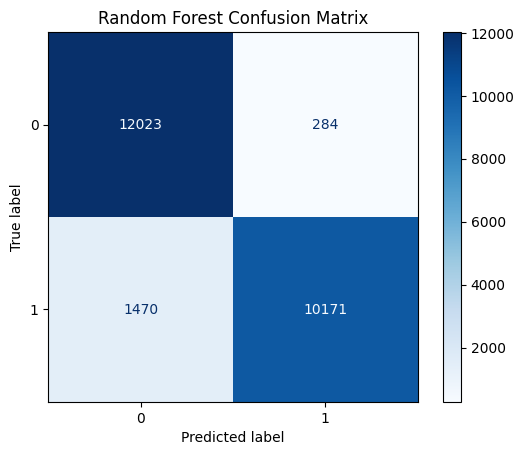

In [39]:
import matplotlib.pyplot as plt

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=[0, 1],
    cmap="Blues",
    values_format="d"
)

plt.title("Random Forest Confusion Matrix")
plt.show()


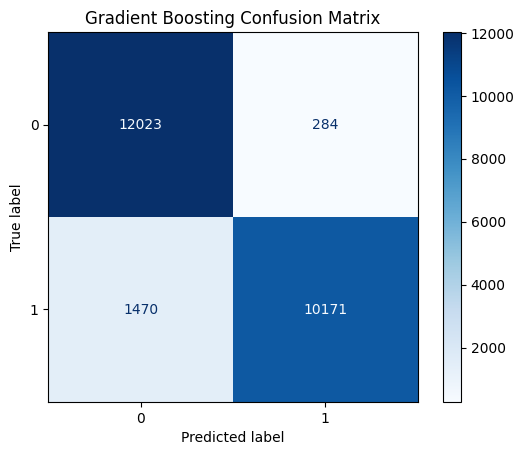

In [38]:
y_pred = gb.predict(X_test)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=[0, 1],
    cmap="Blues",
    values_format="d"
)
plt.title("Gradient Boosting Confusion Matrix")
plt.show()


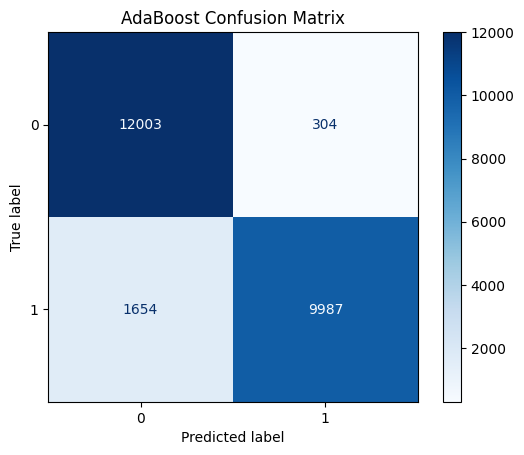

In [40]:
y_pred = ada.predict(X_test)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=[0, 1],
    cmap="Blues",
    values_format="d"
)
plt.title("AdaBoost Confusion Matrix")
plt.show()


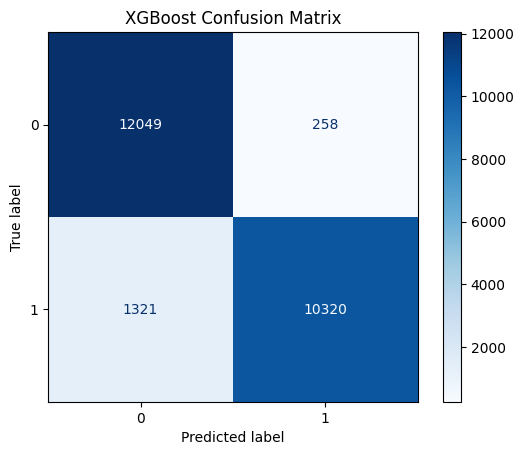

In [41]:
y_pred = xgb.predict(X_test)

ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred,
    display_labels=[0, 1],
    cmap="Blues",
    values_format="d"
)
plt.title("XGBoost Confusion Matrix")
plt.show()
